In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_alzheimer/pubchem_fp.csv')

In [3]:
data

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.301030
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.568636
2,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.744727
3,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.958607
4,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1386,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.109579
1387,1387,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.498120
1388,1388,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.529590
1389,1389,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.822752


In [4]:
X=data.drop('pIC50', axis=1)

In [5]:
X

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1386,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1387,1387,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1388,1388,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1389,1389,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y=data.pIC50

In [7]:
Y

0       5.301030
1       5.568636
2       5.744727
3       4.958607
4       5.000000
          ...   
1386    6.109579
1387    4.498120
1388    5.529590
1389    4.822752
1390    5.885056
Name: pIC50, Length: 1391, dtype: float64

In [8]:
X.shape

(1391, 882)

In [9]:
Y.shape

(1391,)

In [10]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [11]:
X.shape

(1391, 174)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
X_train.shape, Y_train.shape

((1112, 174), (1112,))

In [14]:
X_test.shape, Y_test.shape

((279, 174), (279,))

In [20]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.7579896398628834

In [21]:
Y_pred = model.predict(X_test)

In [23]:
Y_pred.shape

(279,)

<function matplotlib.pyplot.show(close=None, block=None)>

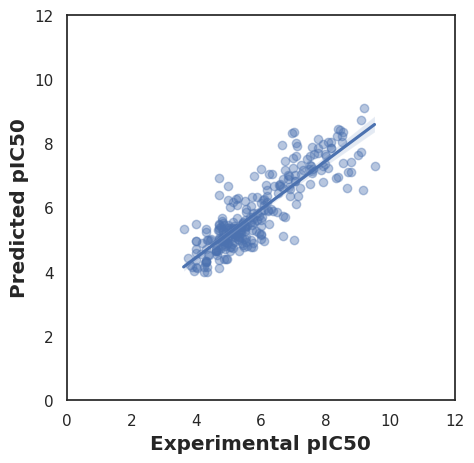

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show